# Figure 5

Examples of measure values for different rollout types. The left column shows rollouts of the attendance as depicted in Figure \ref{fig:patterns}. The center column presents histograms of the observed states for each corresponding rollout. The right column displays the values of each of the five measures for the respective rollout.

In [1]:
import sys
sys.path.append('../src')

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Classes.bar import Bar
from Utils.plot_utils import PlotsAndMeasures
from Utils.utils import GetMeasurements
from Utils.interaction import Performer
from Utils.indices import AlternationIndex
from Config.config import PATHS

In [2]:
def plot_measures(list_of_alternations, list_of_titles, num_rounds):
	fig, axes = plt.subplots(
        len(list_of_alternations), 3,
		figsize=(9, 2.5*len(list_of_alternations)),
		tight_layout=True
	)
	for i, alternations in enumerate(list_of_alternations):

		# Detect number of agents
		num_agents = len(alternations[0])

		# Create bar object
		bar = Bar(
			num_agents=num_agents,
			threshold=0.7
		)
		list_decisions = alternations * (num_rounds // len(alternations)) + alternations[:num_rounds % len(alternations)]
		for decisions in list_decisions:
			bar.step(decisions)

		# Draw bar playout
		bar.render(
			ax=axes[i, 0],
			file=None,
			num_rounds=len(bar.history)
		)
		if list_of_titles is not None:
			axes[i, 0].set_title(list_of_titles[i])
		axes[i, 0].axis('off')

		# Draw states histogram
		data = bar.to_pandas()
		data['model'] = 1
		p = PlotsAndMeasures(data)
		p.plot_hist_states(
			T=np.inf, 
			ax=axes[i, 1]
		)
		axes[i, 1].set_ylim([0, 1])

		# Calculate measures
		gm = GetMeasurements(
			data=data,
			measures=[
				'efficiency', 'bounded_efficiency', 
				'inequality', 'bounded_inequality',
				'entropy', 'conditional_entropy', 
				'conditional_entropy_2nd_order', 'min_entropy'
			],
			T=np.inf
		)
		df = gm.get_measurements()
		# alt_index = AlternationIndex.from_file(priority='sklearn')
		alt_index = AlternationIndex.from_file(priority='mlp')
		# df['alternation_index'] = alt_index(df)
		df['alternation_index'] = alt_index.classify(df)

		# Show measures
		axes[i, 2].text(-0.05, 0.8, f'B.Efficiency={round(df['bounded_efficiency'].values[0], 2)}', fontsize=11)
		axes[i, 2].text(-0.05, 0.65, f'B.inequality={round(df['bounded_inequality'].values[0], 2)}', fontsize=11)
		axes[i, 2].text(-0.05, 0.5, f'entropy={round(df['entropy'].values[0], 2)}', fontsize=11)
		axes[i, 2].text(-0.05, 0.35, f'conditional_entropy={round(df['conditional_entropy'].values[0], 2)}', fontsize=11)
		axes[i, 2].text(-0.05, 0.2, f'2nd_order_cond_entropy={round(df['conditional_entropy_2nd_order'].values[0], 2)}', fontsize=11)
		axes[i, 2].text(-0.05, 0.05, f'alternation_index={df['alternation_index'].values[0]}', fontsize=11)
		# axes[i, 2].text(-0.05, 0.05, f'alternation_index={round(df['alternation_index'].values[0], 2)}', fontsize=11)
		axes[i, 2].set_axis_off()

	fig.savefig(PATHS['figures_for_paper'] / 'Figure5.png', dpi=300)
	fig.show()

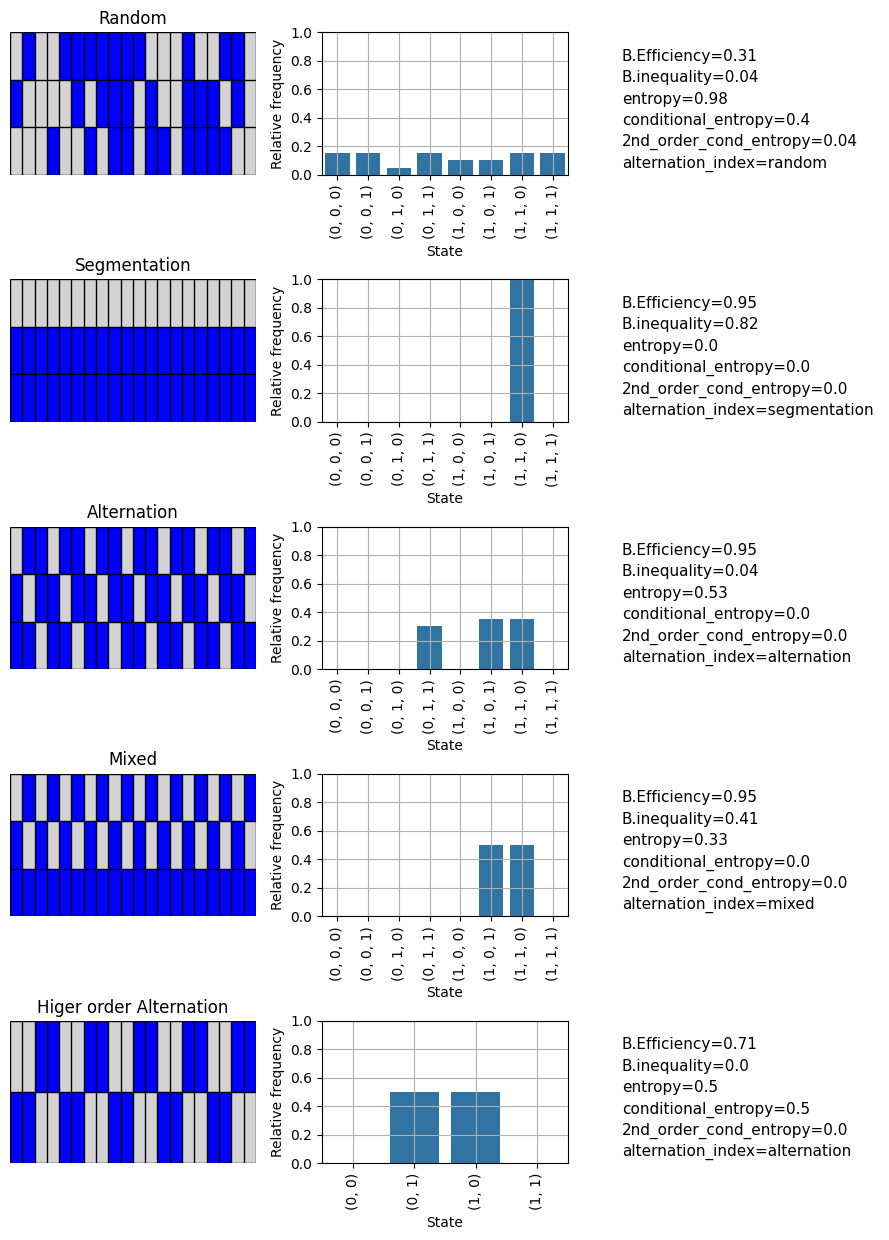

In [8]:
num_rounds = 20
list_of_alternations = [
	[np.random.randint(0, 2, 3).tolist() for _ in range(num_rounds)],
	[[1, 1, 0]],
	[[1, 1, 0], [1, 0, 1], [0, 1, 1]],
	[[1, 1, 0], [1, 0, 1]],
    [[1, 0], [1, 0], [0, 1], [0, 1]],
]
plot_measures(
    list_of_alternations=list_of_alternations, 
    list_of_titles = ['Random', 'Segmentation', 'Alternation', 'Mixed', 'Higer order Alternation'],
    num_rounds=num_rounds
)

---

In [4]:
alternations = list_of_alternations[0]

num_agents = len(alternations[0])

# Create bar object
bar = Bar(
    num_agents=num_agents,
    threshold=0.7
)
list_decisions = alternations * (num_rounds // len(alternations)) + alternations[:num_rounds % len(alternations)]
for decisions in list_decisions:
    bar.step(decisions)

# Draw states histogram
data = bar.to_pandas()
data['model'] = 1

# Calculate measures
gm = GetMeasurements(
    data=data,
    measures=[
        'efficiency', 'bounded_efficiency', 'inequality', 
        'entropy', 'conditional_entropy', 
        'conditional_entropy_2nd_order', 'min_entropy'
    ],
    T=np.inf
)
df = gm.get_measurements()
df

,model,threshold,num_agents,id_sim,efficiency,bounded_efficiency,inequality,entropy,conditional_entropy,conditional_entropy_2nd_order,min_entropy
0,1,0.7,3,1,0.283333,0.404762,0.23094,0.869565,0.342277,0.111111,0.111111


In [5]:
from Utils.utils import ConditionalEntropy

ce = ConditionalEntropy(data)
tm = ce.get_2nd_order_group_transitions(data)
print(tm)

+--------+-----+-----+-----+-----+-----+-----+-----+-----+
|        | 000 | 001 | 010 | 011 | 100 | 101 | 110 | 111 |
+--------+-----+-----+-----+-----+-----+-----+-----+-----+
|  000   |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  001   |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  010   |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  011   |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  100   |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  101   |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  110   |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  111   |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  1000  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  1001  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  1010  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  1011  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  1100  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|  1101  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0 